In [0]:
import os
import subprocess
from keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [6]:
res = subprocess.check_output(["ls"])
for line in res.splitlines():
    print(line.decode('UTF-8'))

sample_data


In [7]:
# 需要翻墙, if u need to download the dataset from google, make it true
if(True):
    !wget --no-check-certificate \
            https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
            -O cats_and_dogs_filtered.zip
    subprocess.call(['unzip', 'cats_and_dogs_filtered.zip'])

--2018-12-29 07:32:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  75.1MB/s    in 0.9s    

2018-12-29 07:32:01 (75.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
res = subprocess.check_output(["ls", "cats_and_dogs_filtered/validation"])

for line in res.splitlines():
    print(line.decode('UTF-8'))

cats
dogs


In [9]:
root = subprocess.check_output(["bash", "-c", "echo $PWD"])
root = root.splitlines()[0].decode('UTF-8')
root += "/cats_and_dogs_filtered"

cats_train = root + "/train/cats"
print("train cat: " + str(len(os.listdir(cats_train))))
dogs_train = root + "/train/dogs"
print("train dog: " + str(len(os.listdir(dogs_train))))
cats_val = root + "/validation/cats"
print("val cat: " + str(len(os.listdir(cats_val))))
dogs_val = root + "/validation/dogs"
print("val dog: " + str(len(os.listdir(dogs_val))))

train cat: 1000
train dog: 1000
val cat: 500
val dog: 500


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(root+"/train",
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

val_generator = val_datagen.flow_from_directory(root+"/validation",
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=val_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 152ms/step - loss: 0.6909 - acc: 0.5405 - val_loss: 0.6774 - val_acc: 0.5290
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6652 - acc: 0.6015 - val_loss: 0.6404 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6295 - acc: 0.6515 - val_loss: 0.7192 - val_acc: 0.5570
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5855 - acc: 0.6940 - val_loss: 0.5951 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5450 - acc: 0.7170 - val_loss: 0.5807 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5159 - acc: 0.7650 - val_loss: 0.5517 - val_acc: 0.7180
Epoch 7/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4913 - acc: 0.7625 - val_loss: 0.5691 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 1

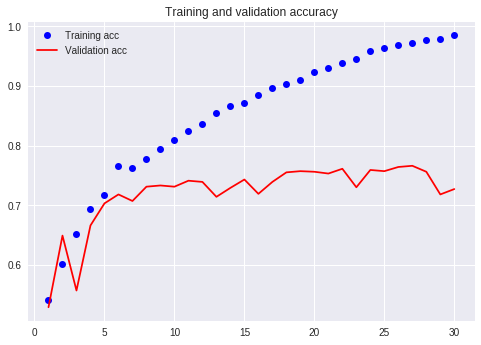

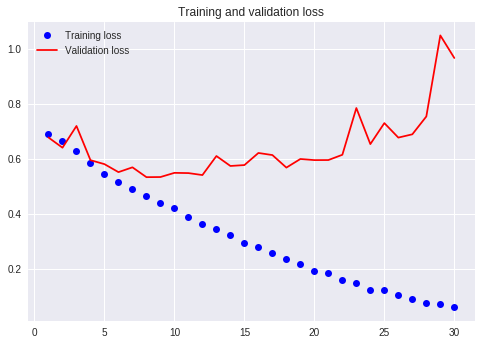

In [14]:
def compare_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label="Validation acc")
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

compare_plot(history)

# Use Data Augmentation to generate some psudo-picture
This is a tricky way to generate 'more' training data when there are not enough data for training.

(150, 150, 3)
(1, 150, 150, 3)


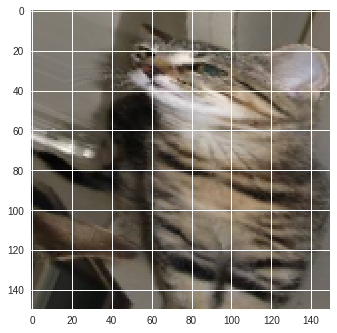

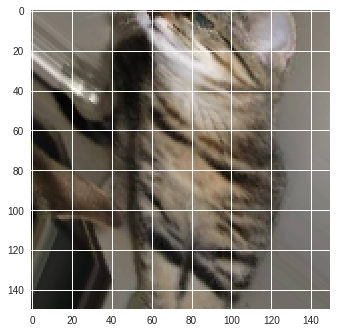

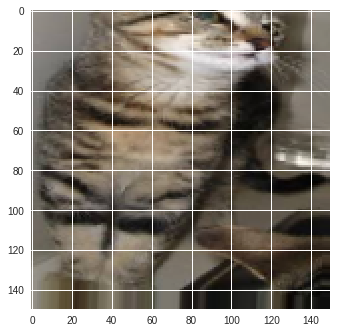

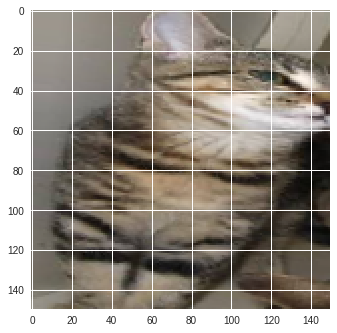

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

fnames = [os.path.join(cats_train, f) for f in os.listdir(cats_train)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Use Drop-out layer combine with data augmentation

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(root+"/train",
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode='binary')

val_generator = val_datagen.flow_from_directory(root+"/validation",
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=val_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 35s 353ms/step - loss: 0.6913 - acc: 0.5197 - val_loss: 0.7484 - val_acc: 0.5006
Epoch 2/100
100/100 [==============================] - 31s 313ms/step - loss: 0.6825 - acc: 0.5588 - val_loss: 0.6734 - val_acc: 0.5290
Epoch 3/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6716 - acc: 0.5781 - val_loss: 0.6489 - val_acc: 0.6136
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6607 - acc: 0.5903 - val_loss: 0.6219 - val_acc: 0.6624
Epoch 5/100
100/100 [==============================] - 32s 315ms/step - loss: 0.6492 - acc: 0.6166 - val_loss: 0.6036 - val_acc: 0.6701
Epoch 6/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6363 - acc: 0.6372 - val_loss: 0.5964 - val_acc: 0.6501
Epoch 7/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6178 - acc: 0.6584 - val_loss: 0.6038 - val_acc: 0.6701
Epoch 8/100
100/100 [===========================

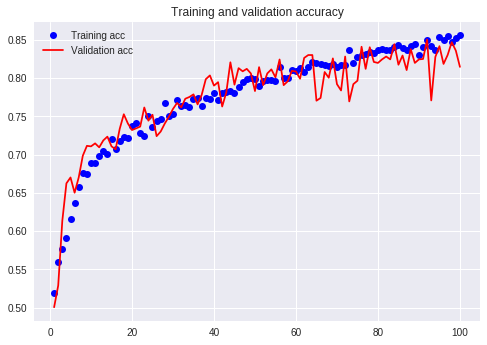

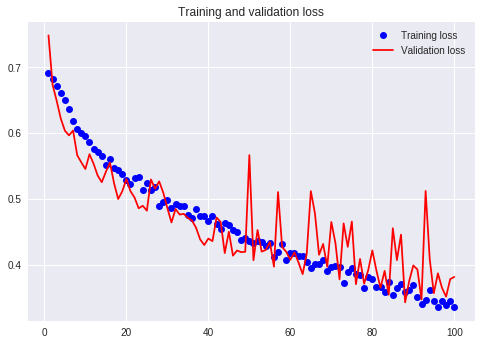

In [19]:
compare_plot(history)

## 老师，能不能再给力一点？
Yes I can. To achieve that, I need pretrained network which is a efficient way to boost your accuracy. The pretrained network should be trained on a huge dataset and be general. 

There are two main ways, including **feature extraction** and **fine-tuning**.

There are many pre-trained model, for example VGG, ResNet, Inception, Inception-ResNet, Xception.

In a convolutional base, lower layer (the layer that be added in to the model prior to others will be lower) can extract more local and general features, like edges and colors.

In [20]:
from keras.applications import VGG16

# incode_top means do we need to include the Dense layer
# input_shape is optional, since the model can deal with input in any shape
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 5s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

## Before we add the dense layer, there are two choice
- Run the conv base on the dataset, and save the output to disc or memory. We can use them to train our Dense layer later. By using this, each pic only calculate once, and the cost is relatively low. However, we cannot use data augmentation now.
- Run through the whole model. In this case, data augmentation is allowed, but the cost also increase significantly.

### We will try both!!!! The following one use method 1

In [21]:
datagen = ImageDataGenerator(rescale=1/.255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))   # the output shape
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary'
    )
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(root+"/train", 2000)
val_features, val_labels = extract_features(root+"/validation", 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
print(train_features.shape, train_labels.shape, val_features.shape, val_labels.shape)

(2000, 4, 4, 512) (2000,) (1000, 4, 4, 512) (1000,)


In [0]:
# to flatten a input we can either add a flatten layer or rashape before use
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(val_features, val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 601us/step - loss: 6.9724 - acc: 0.5455 - val_loss: 4.2571 - val_acc: 0.6950
Epoch 2/30
2000/2000 [==============================] - 1s 429us/step - loss: 4.7772 - acc: 0.6835 - val_loss: 3.0069 - val_acc: 0.7880
Epoch 3/30
2000/2000 [==============================] - 1s 427us/step - loss: 3.5527 - acc: 0.7585 - val_loss: 1.8833 - val_acc: 0.8690
Epoch 4/30
2000/2000 [==============================] - 1s 422us/step - loss: 2.8406 - acc: 0.8100 - val_loss: 1.5242 - val_acc: 0.8900
Epoch 5/30
2000/2000 [==============================] - 1s 416us/step - loss: 2.6684 - acc: 0.8220 - val_loss: 1.5667 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 1s 420us/step - loss: 2.2528 - acc: 0.8460 - val_loss: 1.4669 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 1s 432us/step - loss: 2.2049 - acc: 0.8525 - val_loss: 1.4331 - val_acc: 0.9020


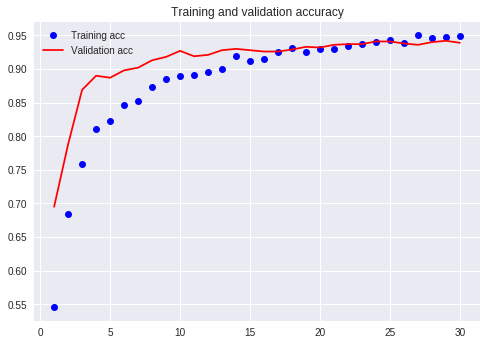

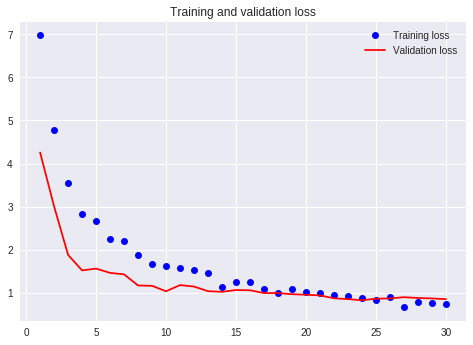

In [25]:
compare_plot(history)

---

### Now we can try method 2

In [26]:
# freeze the convolutional base, 保证不会被一开始的权重更新毁掉pre-trained的weight
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# since we used binary_crossentropy, therefore, binary class mode is used
train_generator = train_datagen.flow_from_directory(root+"/train",
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

val_generator = val_datagen.flow_from_directory(root+"/validation",
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy']
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
# run this cell only you have a GPU (at least a GTX1060 or equivalent), otherwise GG.

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=val_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5979 - acc: 0.7070 - val_loss: 0.4477 - val_acc: 0.8250
Epoch 2/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4896 - acc: 0.7795 - val_loss: 0.3748 - val_acc: 0.8390
Epoch 3/30
100/100 [==============================] - 26s 263ms/step - loss: 0.4458 - acc: 0.7985 - val_loss: 0.3369 - val_acc: 0.8570
Epoch 4/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4199 - acc: 0.8190 - val_loss: 0.3192 - val_acc: 0.8560
Epoch 5/30
100/100 [==============================] - 26s 262ms/step - loss: 0.3798 - acc: 0.8350 - val_loss: 0.3092 - val_acc: 0.8640
Epoch 6/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3763 - acc: 0.8335 - val_loss: 0.2947 - val_acc: 0.8770
Epoch 7/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3608 - acc: 0.8465 - val_loss: 0.2846 - val_acc: 0.8720
Epoch 8/30
100/100 [==============================] - 2

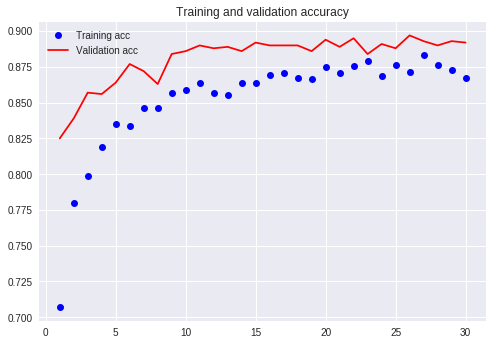

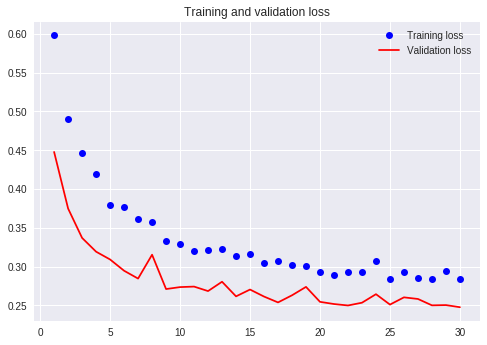

In [29]:
compare_plot(history)

## Now we are going to try some fine-tuning technique

1. add some custom layer on the top of base network
2. freeze the base network
3. train what we add
4. unfreeze some of our base network
5. keep training

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [36]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [39]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=val_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 301ms/step - loss: 0.3003 - acc: 0.8640 - val_loss: 0.2177 - val_acc: 0.9130
Epoch 2/100
100/100 [==============================] - 27s 272ms/step - loss: 0.2565 - acc: 0.8955 - val_loss: 0.2123 - val_acc: 0.9160
Epoch 3/100
100/100 [==============================] - 27s 272ms/step - loss: 0.2452 - acc: 0.8990 - val_loss: 0.2516 - val_acc: 0.9090
Epoch 4/100
100/100 [==============================] - 27s 272ms/step - loss: 0.2243 - acc: 0.9040 - val_loss: 0.2051 - val_acc: 0.9260
Epoch 5/100
100/100 [==============================] - 27s 273ms/step - loss: 0.2038 - acc: 0.9160 - val_loss: 0.4704 - val_acc: 0.8390
Epoch 6/100
100/100 [==============================] - 27s 273ms/step - loss: 0.1787 - acc: 0.9255 - val_loss: 0.1615 - val_acc: 0.9350
Epoch 7/100
100/100 [==============================] - 27s 272ms/step - loss: 0.1828 - acc: 0.9295 - val_loss: 0.2132 - val_acc: 0.9230
Epoch 8/100
100/100 [===========================

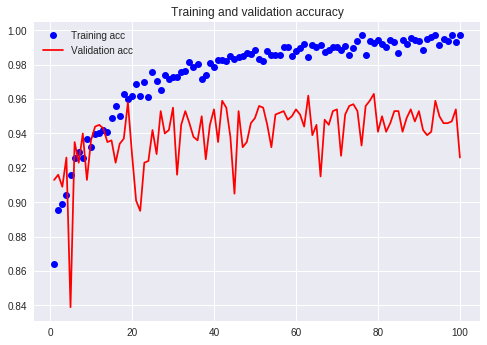

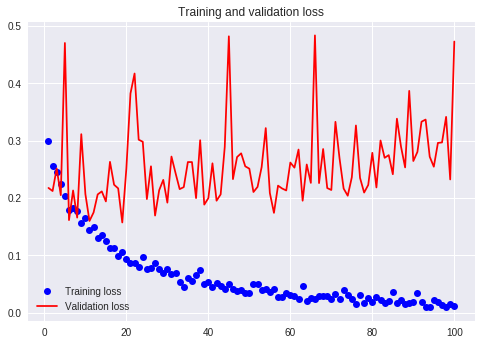

In [40]:
compare_plot(history)

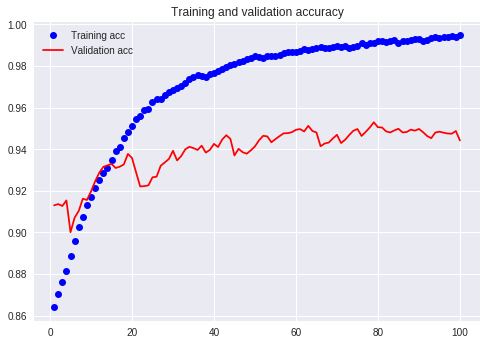

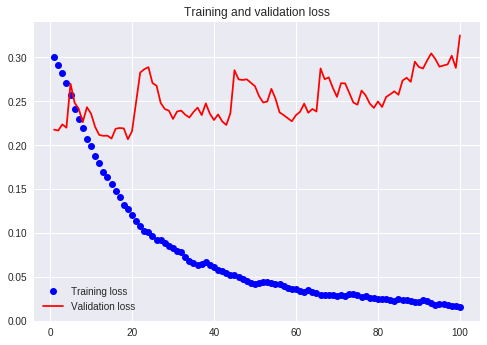

In [42]:
# make the curve smoother, and eliminate the noise

def smoother(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, smoother(acc), 'bo', label='Training acc')
plt.plot(epochs, smoother(val_acc), 'r', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smoother(loss), 'bo', label='Training loss')
plt.plot(epochs, smoother(val_loss), 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()